# Numerical flower
*5 Feb 2020*

A simple notebook to check if the "flower" pattern in the curl (and divergence of a point source) disappears when we make the pixel size smaller.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from helpers import CustomImage, autoshow

In [2]:
zl = .5
ext = 0.8

In [3]:
# Now we'll try a random distribution of subhalos
np.random.seed(123)

xs, ys, redshifts, masses = [], [], [], []
for i in range(10):
    xs.append( np.random.uniform(-ext,ext) )
    ys.append( np.random.uniform(-ext,ext) )
    redshifts.append( zl ) 
    masses.append( 1e8 )

In [4]:
pixnums = [200, 400, 800, 1600]

img_list = []

for pixnum in pixnums:
    pixsize = 2*ext/pixnum
    img = CustomImage(xs,ys,redshifts, m=masses, zl=zl,
                      pixnum=pixnum, pixsize=pixsize, mass_sheets=False)
    img_list.append(img)

In [5]:
img0 = img_list[0]

In [6]:
img0.calc_div_curl();

(array([[0.1957585 , 0.19592521, 0.19682216, ..., 0.37470176, 0.37321583,
         0.37303831],
        [0.19611736, 0.19628982, 0.1971962 , ..., 0.37553388, 0.37401176,
         0.37381181],
        [0.19726786, 0.19744839, 0.19836625, ..., 0.37787738, 0.37631033,
         0.37607857],
        ...,
        [0.37682984, 0.37712274, 0.37874691, ..., 0.19952907, 0.19860017,
         0.19839916],
        [0.37460601, 0.37486584, 0.3764447 , ..., 0.19837863, 0.19745991,
         0.19726609],
        [0.3738831 , 0.3741203 , 0.37566368, ..., 0.19801939, 0.19710898,
         0.19692027]]),
 array([[-6.64808713e-05, -2.89064304e-04, -2.97004692e-04, ...,
          6.16191889e-04,  5.95426103e-04,  2.08765764e-04],
        [ 2.22129780e-04, -4.73277688e-07, -6.08048091e-07, ...,
          1.93019552e-06,  1.57489947e-06, -3.85183450e-04],
        [ 2.30115872e-04, -3.52625089e-07, -4.88081131e-07, ...,
          1.62975046e-06,  1.27149335e-06, -4.06195547e-04],
        ...,
        [-4.360764

In [9]:
img_blank = CustomImage([],[],[], zl=zl, pixnum=200, pixsize=2*ext/200)
img_blank.calc_div_curl();

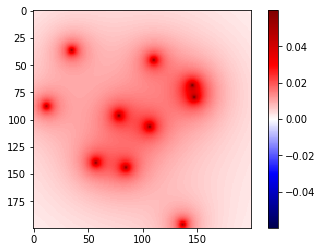

In [12]:
autoshow(img0.divmat - img_blank.divmat)

In [11]:
xs, ys

([0.3143506969565786,
  -0.437037674297275,
  0.351150351656901,
  0.7692227174153847,
  -0.03050895762502248,
  -0.250915174158609,
  -0.0982844085126009,
  -0.16312919147130978,
  -0.5080132312744001,
  0.05048219814694144],
 [-0.34217706407939286,
  0.08210363053262593,
  -0.12302966380086244,
  0.2957275817357812,
  -0.1726119708893592,
  0.3664795318144667,
  -0.7045153654246907,
  0.3807926491712572,
  -0.519277190164012,
  0.05092413935498574])

In [13]:
for img in img_list[1:]:
    img.calc_div_curl()

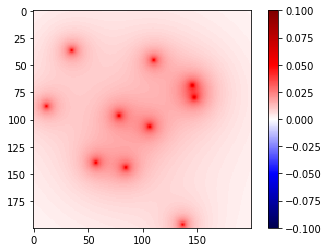

In [14]:
autoshow(img_list[0].divmat - img_blank.divmat, vmax=.1)

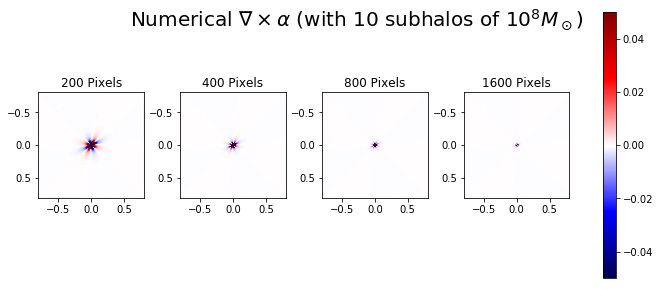

In [21]:
fig, axs = plt.subplots(1,4, figsize=(10,4))

for i, (pixnum, img) in enumerate(zip(pixnums, img_list)):
    vmax = .05
    extent = [-ext,ext,ext,-ext]
    
    im = axs[i].imshow(img.curlmat, vmin=-vmax, vmax=vmax, cmap='seismic', extent=extent)
    axs[i].set_title('{} Pixels'.format(pixnum))
    
    #autoshow(img.curlmat, vmax=.01, ext=ext, myplt=axs[i])
    #axs[i].xlabel('{} Pixels'.format(pixnum))
plt.tight_layout()
plt.suptitle(r'Numerical $\nabla\times\alpha$ (with 10 subhalos of $10^8 M_\odot$)', size=20)
plt.colorbar(im, ax=axs.ravel().tolist())
#plt.savefig('imgs/feb5_flower_subs.png')
plt.show()

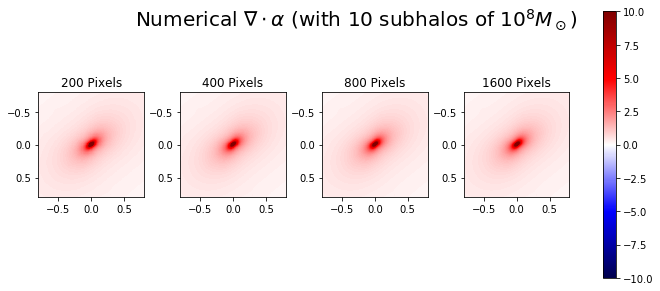

In [18]:
fig, axs = plt.subplots(1,4, figsize=(10,4))

for i, (pixnum, img) in enumerate(zip(pixnums, img_list)):
    vmax = 10
    extent = [-ext,ext,ext,-ext]
    
    im = axs[i].imshow(img.divmat, vmin=-vmax, vmax=vmax, cmap='seismic', extent=extent)
    axs[i].set_title('{} Pixels'.format(pixnum))
    
    #autoshow(img.curlmat, vmax=.01, ext=ext, myplt=axs[i])
    #axs[i].xlabel('{} Pixels'.format(pixnum))
plt.tight_layout()
plt.suptitle(r'Numerical $\nabla\cdot\alpha$ (with 10 subhalos of $10^8 M_\odot$)', size=20)
plt.colorbar(im, ax=axs.ravel().tolist())
#plt.savefig('imgs/feb5_flower_subs.png')
plt.show()

## Old cells

In [ ]:
ext = 0.1

In [ ]:
pixnums = [200, 400, 800, 1600]

img2_list = []

for pixnum in pixnums:
    pixsize = 2*ext/pixnum
    img2 = CustomImage([],[],[], zl=zl, pixnum=pixnum, pixsize=pixsize)
    img2_list.append(img2)